Running simulation without error correction...
Running simulation with Shor error correction...

Results:
Without error correction: 0=0.373, 1=0.627
With Shor error correction: 0=0.857, 1=0.143
Deviation from expected 50/50 without EC: 25.40%
Deviation from expected 50/50 with EC: 71.40%


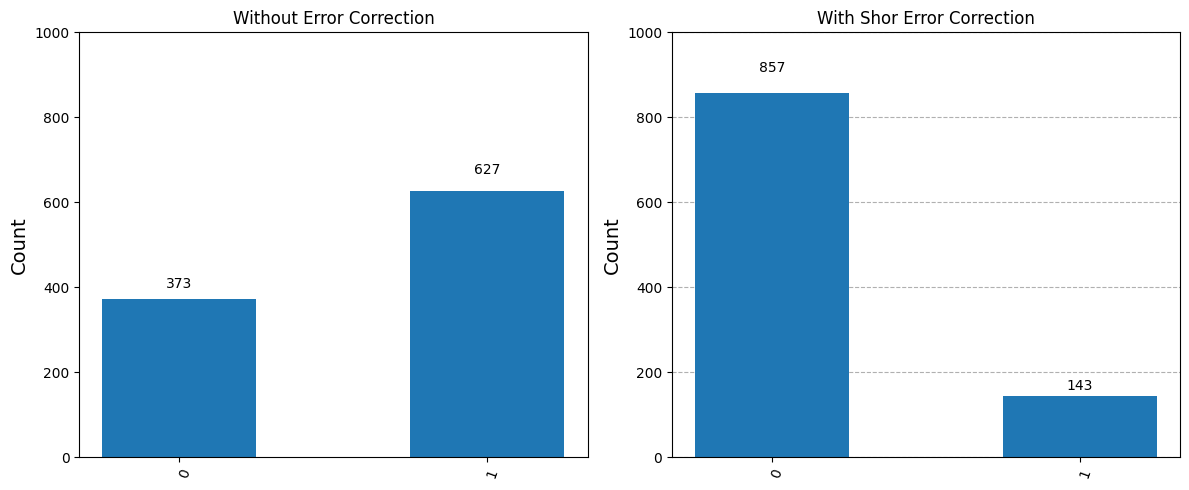


Demonstrating error correction with specific error injection...
Results with intentional error on qubit 4: {'1': 1000}
Success rate: 100.0% (should be 100% with perfect correction)

Circuit depth: 18
Number of gates: 40
Circuit width (qubits): 9
Shor Encoding Circuit:
               ┌───┐          
q_0: ──■────■──┤ H ├──■────■──
       │    │  └───┘┌─┴─┐  │  
q_1: ──┼────┼───────┤ X ├──┼──
       │    │       └───┘┌─┴─┐
q_2: ──┼────┼────────────┤ X ├
     ┌─┴─┐  │  ┌───┐     └───┘
q_3: ┤ X ├──┼──┤ H ├──■────■──
     └───┘  │  └───┘┌─┴─┐  │  
q_4: ───────┼───────┤ X ├──┼──
            │       └───┘┌─┴─┐
q_5: ───────┼────────────┤ X ├
          ┌─┴─┐┌───┐     └───┘
q_6: ─────┤ X ├┤ H ├──■────■──
          └───┘└───┘┌─┴─┐  │  
q_7: ───────────────┤ X ├──┼──
                    └───┘┌─┴─┐
q_8: ────────────────────┤ X ├
                         └───┘

Simplified Shor QEC Circuit:
     ┌───┐          ┌───┐           ░           ┌───┐          ┌─┐
q_0: ┤ H ├──■────■──┤ H ├──■────■───░───■───

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.quantum_info import Statevector, state_fidelity
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import matplotlib.pyplot as plt
import numpy as np
def shor_encode():
 qc = QuantumCircuit(9, name="ShorEncode")
 qc.cx(0, 3)
 qc.cx(0, 6)
 qc.h(0)
 qc.h(3)
 qc.h(6)
 qc.cx(0, 1)
 qc.cx(0, 2)
 qc.cx(3, 4)
 qc.cx(3, 5)
 qc.cx(6, 7)
 qc.cx(6, 8)
 return qc
def measure_syndromes():
 qc = QuantumCircuit(9, 6, name="SyndromeMeasurement")
 qc.barrier()
 qc.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
 return qc
def apply_quantum_operations():
 qc = QuantumCircuit(9, name="QuantumOperations")
 qc.h(0)
 qc.rx(0.5, 1)
 qc.ry(0.3, 2)
 qc.rz(0.7, 3)
 qc.s(4)
 qc.sdg(5)
 qc.t(6)
 qc.tdg(7)
 qc.x(8)
 qc.cx(0, 4)
 qc.cz(1, 5)
 qc.swap(2, 6)
 return qc
def apply_error_correction(syndrome_bits="000000"):
 qc = QuantumCircuit(9, name="ErrorCorrection")
 qc.barrier()
 qc.x(0)
 qc.z(0)
 qc.x(0)
 qc.z(0)
 return qc
def shor_qec_circuit():
 qc = QuantumCircuit(9, 1)
 qc.h(0)
 operations_circuit = apply_quantum_operations()
 qc = qc.compose(operations_circuit)
 encode_circuit = shor_encode()
 qc = qc.compose(encode_circuit)
 qc.barrier()
 qc.barrier()
 syndrome_pattern = "000000"
 correction_circuit = apply_error_correction(syndrome_pattern)
 qc = qc.compose(correction_circuit)
 decode_circuit = shor_encode().inverse()
 qc = qc.compose(decode_circuit)
 qc.measure(0, 0)
 return qc
noise_model = NoiseModel()
p1 = 0.01
p2 = 0.03
error1 = depolarizing_error(p1, 1)
noise_model.add_all_qubit_quantum_error(error1, ['h', 'x', 'y', 'z', 's', 'sdg', 't', 'tdg', 'rx', 'ry', 'rz'])
error2 = depolarizing_error(p2, 2)
noise_model.add_all_qubit_quantum_error(error2, ['cx', 'cz', 'swap'])
def run_comparison():
 backend = AerSimulator(noise_model=noise_model)
 qc_no_ec = QuantumCircuit(1, 1)
 qc_no_ec.h(0)
 qc_no_ec.rx(0.5, 0)
 qc_no_ec.ry(0.3, 0)
 qc_no_ec.rz(0.7, 0)
 qc_no_ec.measure(0, 0)
 qc_with_ec = shor_qec_circuit()
 transpiled_no_ec = transpile(qc_no_ec, backend)
 transpiled_with_ec = transpile(qc_with_ec, backend)
 print("Running simulation without error correction...")
 result_no_ec = backend.run(transpiled_no_ec, shots=1000).result()
 counts_no_ec = result_no_ec.get_counts()
 print("Running simulation with Shor error correction...")
 result_with_ec = backend.run(transpiled_with_ec, shots=1000).result()
 counts_with_ec = result_with_ec.get_counts()
 prob_0_no_ec = counts_no_ec.get('0', 0) / 1000
 prob_1_no_ec = counts_no_ec.get('1', 0) / 1000
 prob_0_with_ec = counts_with_ec.get('0', 0) / 1000
 prob_1_with_ec = counts_with_ec.get('1', 0) / 1000
 print(f"\nResults:")
 print(f"Without error correction: 0={prob_0_no_ec:.3f}, 1={prob_1_no_ec:.3f}")
 print(f"With Shor error correction: 0={prob_0_with_ec:.3f}, 1={prob_1_with_ec:.3f}")
 deviation_no_ec = abs(0.5 - prob_0_no_ec) * 200
 deviation_with_ec = abs(0.5 - prob_0_with_ec) * 200
 print(f"Deviation from expected 50/50 without EC: {deviation_no_ec:.2f}%")
 print(f"Deviation from expected 50/50 with EC: {deviation_with_ec:.2f}%")
 fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
 plot_histogram(counts_no_ec, ax=ax1)
 ax1.set_title('Without Error Correction')
 ax1.set_ylim(0, 1000)
 plot_histogram(counts_with_ec, ax=ax2)
 ax2.set_title('With Shor Error Correction')
 ax2.set_ylim(0, 1000)
 plt.tight_layout()
 plt.savefig('shor_code_comparison.png', dpi=300, bbox_inches='tight')
 plt.show()
 return counts_no_ec, counts_with_ec
def demonstrate_error_correction():
 print("\nDemonstrating error correction with specific error injection...")
 qc = QuantumCircuit(9, 1)
 qc.x(0)
 encode_circuit = shor_encode()
 qc = qc.compose(encode_circuit)
 qc.x(4)
 decode_circuit = shor_encode().inverse()
 qc = qc.compose(decode_circuit)
 qc.measure(0, 0)
 backend = AerSimulator()
 transpiled_qc = transpile(qc, backend)
 result = backend.run(transpiled_qc, shots=1000).result()
 counts = result.get_counts()
 success_rate = counts.get('1', 0) / 10
 print(f"Results with intentional error on qubit 4: {counts}")
 print(f"Success rate: {success_rate:.1f}% (should be 100% with perfect correction)")
 return counts
def visualize_circuits():
 encode_circuit = shor_encode()
 print("Shor Encoding Circuit:")
 print(encode_circuit.draw(output='text'))
 simple_qec = QuantumCircuit(9, 1)
 simple_qec.h(0)
 simple_qec = simple_qec.compose(shor_encode())
 simple_qec.barrier()
 simple_qec = simple_qec.compose(shor_encode().inverse())
 simple_qec.measure(0, 0)
 print("\nSimplified Shor QEC Circuit:")
 print(simple_qec.draw(output='text'))
if __name__ == "__main__":
 counts_no_ec, counts_with_ec = run_comparison()
 error_counts = demonstrate_error_correction()
 qc = shor_qec_circuit()
 print("\nCircuit depth:", qc.depth())
 print("Number of gates:", qc.size())
 print("Circuit width (qubits):", qc.num_qubits)
 visualize_circuits()

In [2]:
%pip install qiskit qiskit-aer matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.9 MB/s eta 0:00:00
